In [7]:
import pandas as pd

# Load the uploaded dataset to inspect its structure
file_path = '/Users/jinnanut/Library/Mobile Documents/com~apple~CloudDocs/NUT/Exeter University/Master/BEMM457 Topic in BA/Individual Project/Datacoding/DataQ3.csv'
data = pd.read_csv(file_path)

# Display the first few rows to understand its structure
# data.head()

# Reshape the data into a tidy format for analysis
# Converting spending columns to numerical values and melting the data for ANOVA
data_melted = pd.melt(data, 
                      id_vars=["Region of Visit", "Main Country Visited"],
                      var_name="Region of Residence", 
                      value_name="Spending")

# Remove commas and convert the Spending column to numeric
data_melted["Spending"] = data_melted["Spending"].replace({',': ''}, regex=True).astype(float)

# Drop rows with missing or invalid data
data_melted.dropna(subset=["Spending"], inplace=True)

# Display the first few rows of the reshaped data
# data_melted.head()

import statsmodels.api as sm
from statsmodels.formula.api import ols

# # Fit the two-way ANOVA model
# model = ols('Spending ~ C(Region of Visit) + C(Region of Residence) + C(Region of Visit):C(Region of Residence)', 
#             data=data_melted).fit()

# # Perform ANOVA
# anova_table = sm.stats.anova_lm(model, typ=2)

# # Display the results
# import ace_tools as tools; tools.display_dataframe_to_user(name="ANOVA Results Table", dataframe=anova_table)

# anova_table

# Rename columns to remove spaces for compatibility with statsmodels
data_melted.rename(columns={
    "Region of Visit": "Region_of_Visit",
    "Region of Residence": "Region_of_Residence",
    "Main Country Visited": "Main_Country_Visited"
}, inplace=True)

# Fit the two-way ANOVA model again
model = ols('Spending ~ C(Region_of_Visit) + C(Region_of_Residence) + C(Region_of_Visit):C(Region_of_Residence)', 
            data=data_melted).fit()

# Perform ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)

anova_table


,sum_sq,df,F,PR(>F)
C(Region_of_Visit),1.004430e+08,3.0,77.129442,2.325524e-43
C(Region_of_Residence),4.359775e+06,11.0,0.913047,5.271156e-01
C(Region_of_Visit):C(Region_of_Residence),7.494409e+06,33.0,0.523173,9.880668e-01
Residual,3.177527e+08,732.0,NaN,NaN


NameError: name 'data_melted' is not defined

<Figure size 1400x800 with 0 Axes>

/var/folders/qm/xr3xsq8s2hl_27kvzqb6mkz40000gn/T/ipykernel_30603/3373883920.py:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=reshaped_df, x="Region_of_Visit", y="Spending", hue="Region_of_Residence", ci=None)


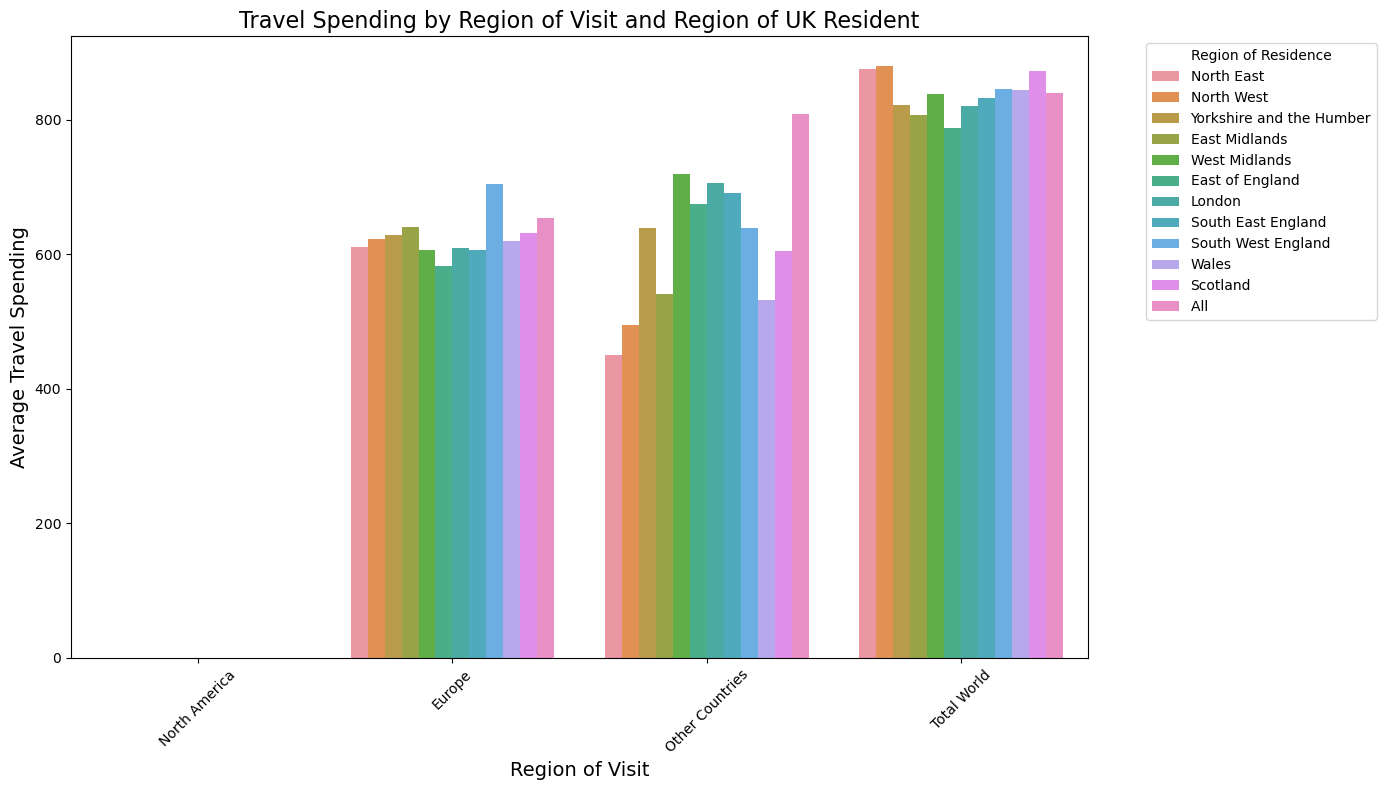

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/Users/jinnanut/Library/Mobile Documents/com~apple~CloudDocs/NUT/Exeter University/Master/BEMM457 Topic in BA/Individual Project/Datacoding/DataQ3.csv'
data = pd.read_csv(file_path)


# Reshape data manually: Assume that 'Region of Visit' and 'Region of Residence' are row/column indicators
reshaped_data = []
for _, row in data.iterrows():
    region_of_visit = row['Region of Visit']
    for region_of_residence in data.columns[2:]:  # Skip 'Region of Visit' and 'Region of Residence'
        spending = row[region_of_residence]
        reshaped_data.append({
            'Region_of_Visit': region_of_visit,
            'Region_of_Residence': region_of_residence,
            'Spending': spending
        })

# Convert to a DataFrame
reshaped_df = pd.DataFrame(reshaped_data)

# Convert Spending to numeric if necessary
reshaped_df['Spending'] = pd.to_numeric(reshaped_df['Spending'], errors='coerce')

# Plot the data
plt.figure(figsize=(14, 8))
sns.barplot(data=reshaped_df, x="Region_of_Visit", y="Spending", hue="Region_of_Residence", ci=None)

# Customize the plot
plt.title('Travel Spending by Region of Visit and Region of UK Resident', fontsize=16)
plt.xlabel('Region of Visit', fontsize=14)
plt.ylabel('Average Travel Spending', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title="Region of Residence", bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()


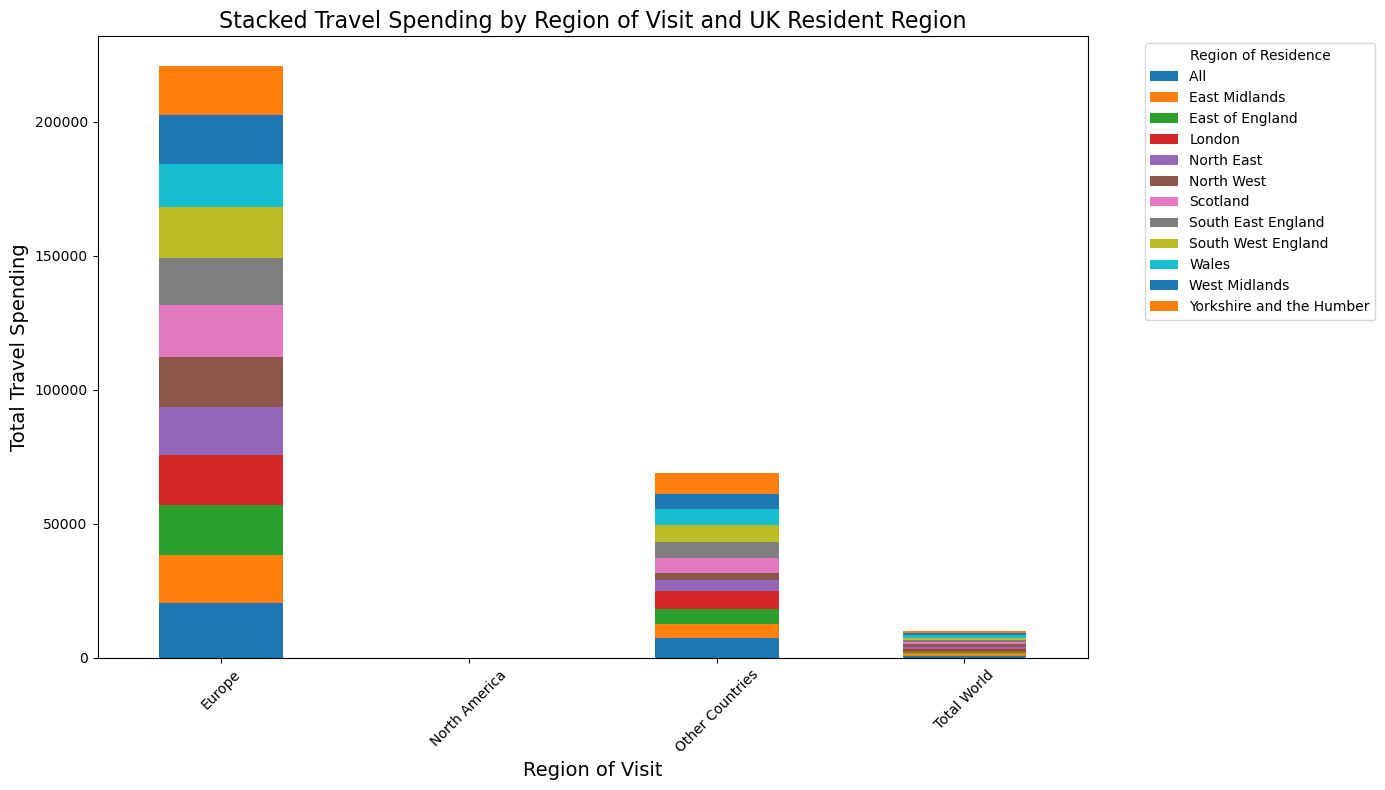

In [7]:
# Group data by Region_of_Visit and Region_of_Residence and sum Spending
grouped_data = reshaped_df.groupby(["Region_of_Visit", "Region_of_Residence"]).sum().reset_index()

# Pivot data for stacked bar chart
pivot_table = grouped_data.pivot(index="Region_of_Visit", columns="Region_of_Residence", values="Spending")

# Plot
pivot_table.plot(kind="bar", stacked=True, figsize=(14, 8))

# Customize
plt.title("Stacked Travel Spending by Region of Visit and UK Resident Region", fontsize=16)
plt.xlabel("Region of Visit", fontsize=14)
plt.ylabel("Total Travel Spending", fontsize=14)
plt.legend(title="Region of Residence", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


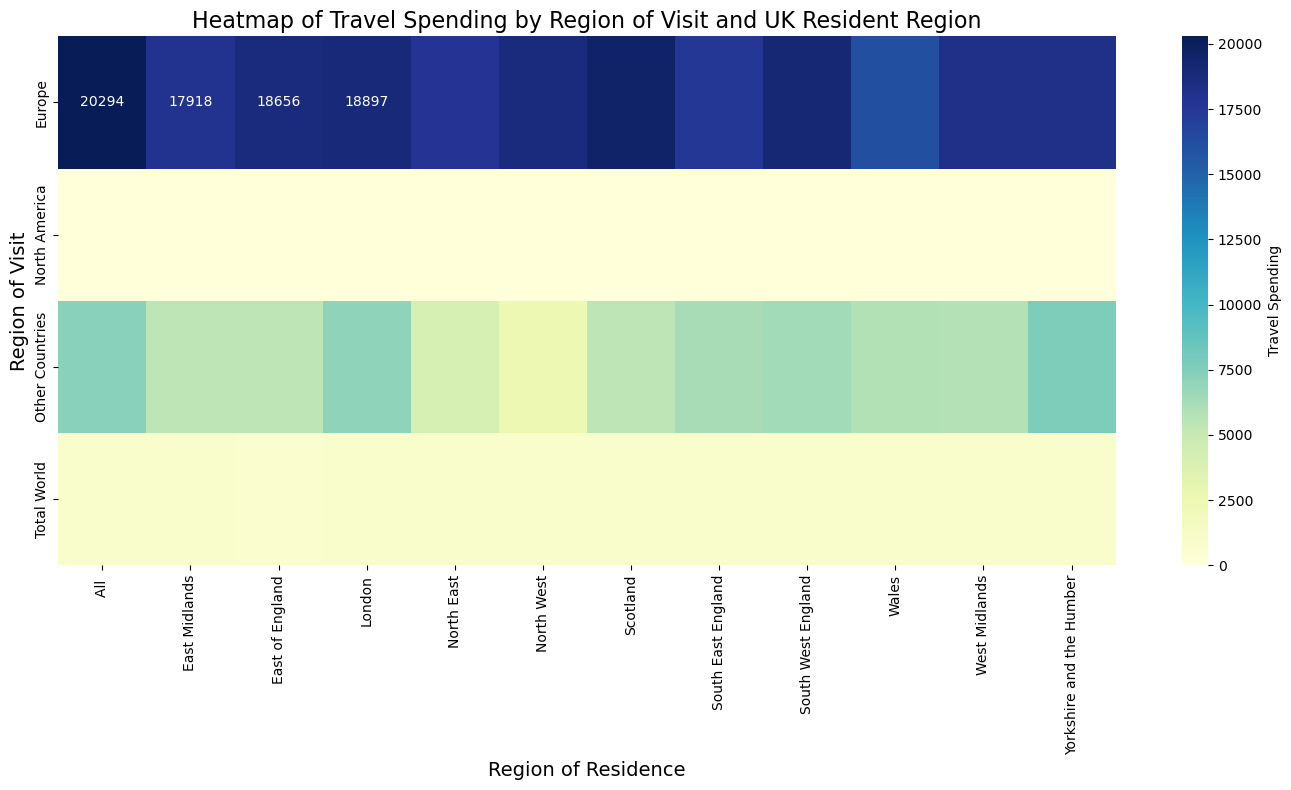

In [8]:
# Create a pivot table for the heatmap
heatmap_data = reshaped_df.pivot_table(index="Region_of_Visit", columns="Region_of_Residence", values="Spending", aggfunc="sum")

# Plot heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="YlGnBu", cbar_kws={'label': 'Travel Spending'})

# Customize
plt.title("Heatmap of Travel Spending by Region of Visit and UK Resident Region", fontsize=16)
plt.xlabel("Region of Residence", fontsize=14)
plt.ylabel("Region of Visit", fontsize=14)
plt.tight_layout()

plt.show()


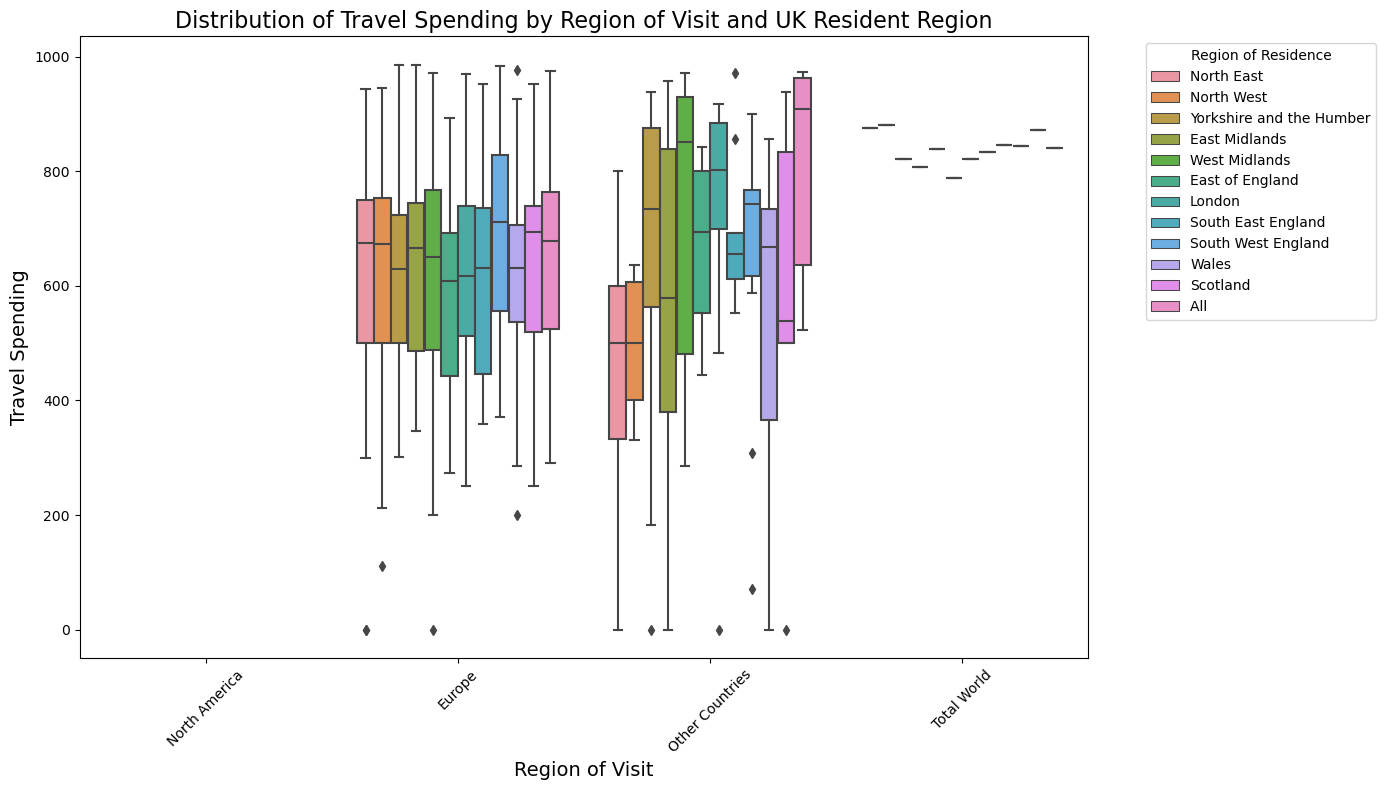

In [9]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=reshaped_df, x="Region_of_Visit", y="Spending", hue="Region_of_Residence")

# Customize
plt.title("Distribution of Travel Spending by Region of Visit and UK Resident Region", fontsize=16)
plt.xlabel("Region of Visit", fontsize=14)
plt.ylabel("Travel Spending", fontsize=14)
plt.xticks(rotation=45)
plt.legend(title="Region of Residence", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()


<Figure size 1400x800 with 0 Axes>

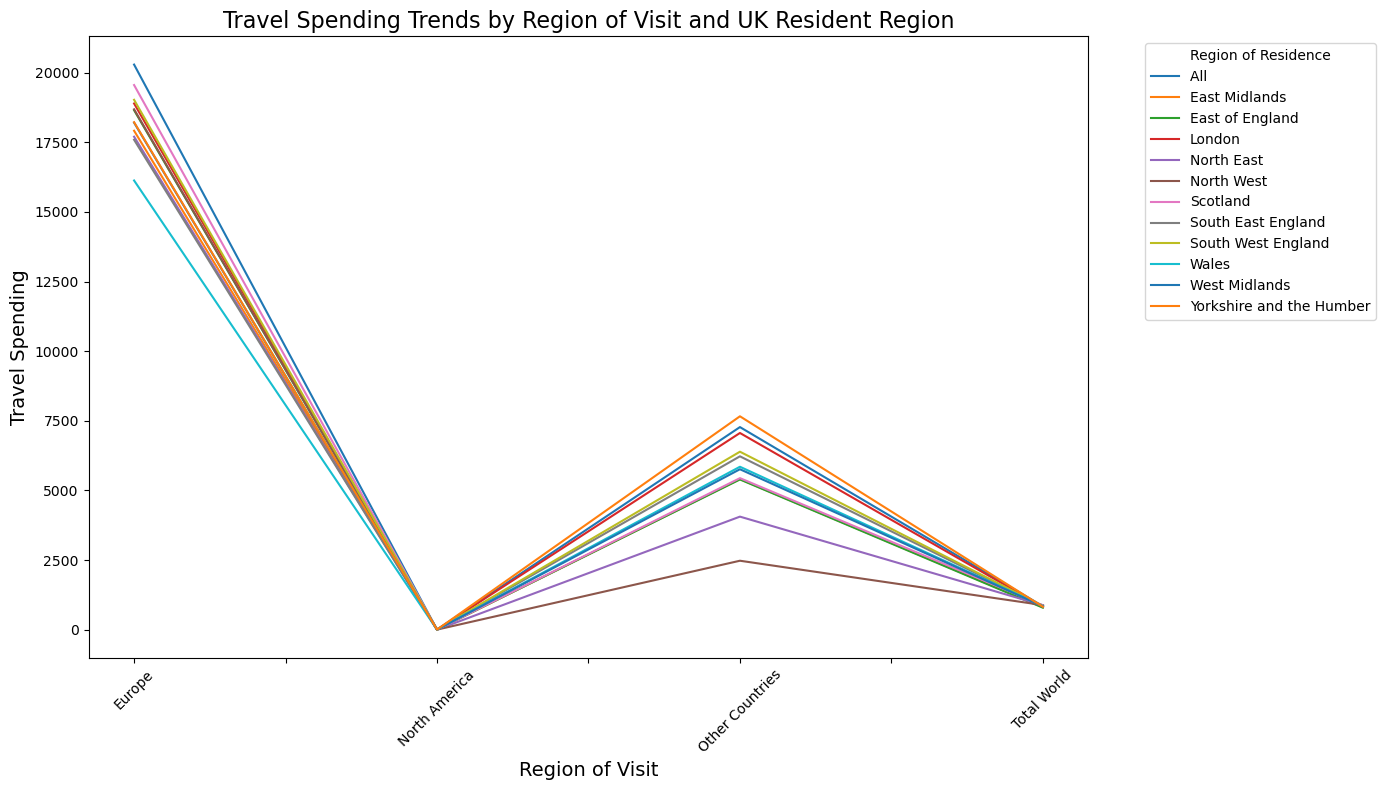

In [10]:
plt.figure(figsize=(14, 8))

# Group and pivot for line plot
line_data = grouped_data.pivot(index="Region_of_Visit", columns="Region_of_Residence", values="Spending")

# Plot each line
line_data.plot(kind="line", figsize=(14, 8))

# Customize
plt.title("Travel Spending Trends by Region of Visit and UK Resident Region", fontsize=16)
plt.xlabel("Region of Visit", fontsize=14)
plt.ylabel("Travel Spending", fontsize=14)
plt.xticks(rotation=45)
plt.legend(title="Region of Residence", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()


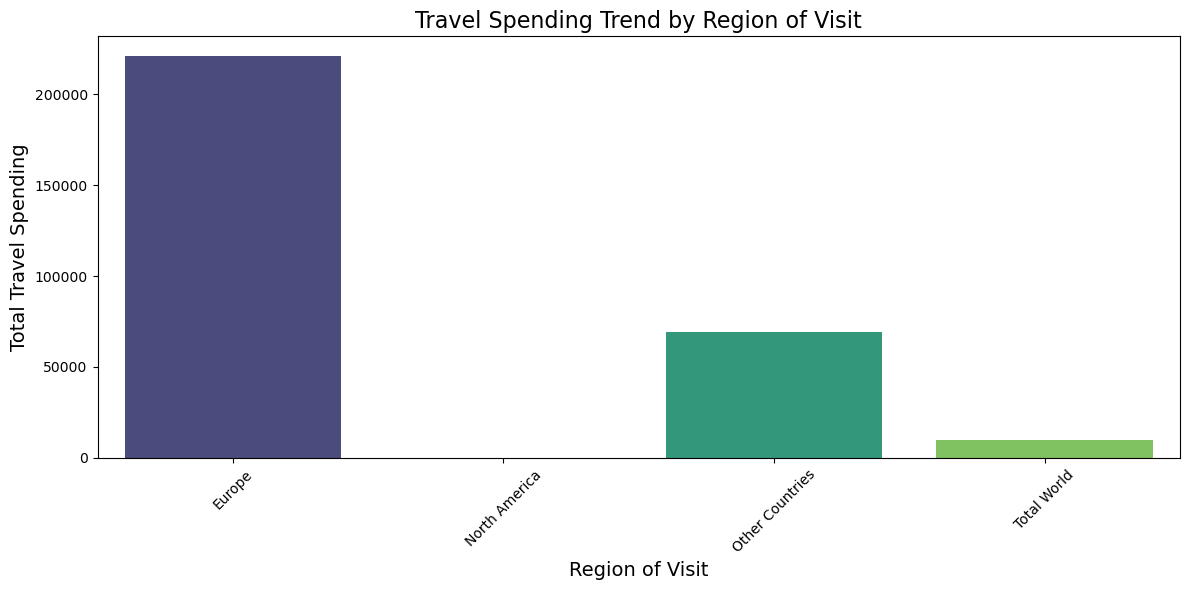

In [11]:
# Group data by Region_of_Visit and sum the Spending
trend_data = reshaped_df.groupby("Region_of_Visit")["Spending"].sum().reset_index()

# Plot the bar chart
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(data=trend_data, x="Region_of_Visit", y="Spending", palette="viridis")

# Customize the plot
plt.title("Travel Spending Trend by Region of Visit", fontsize=16)
plt.xlabel("Region of Visit", fontsize=14)
plt.ylabel("Total Travel Spending", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()


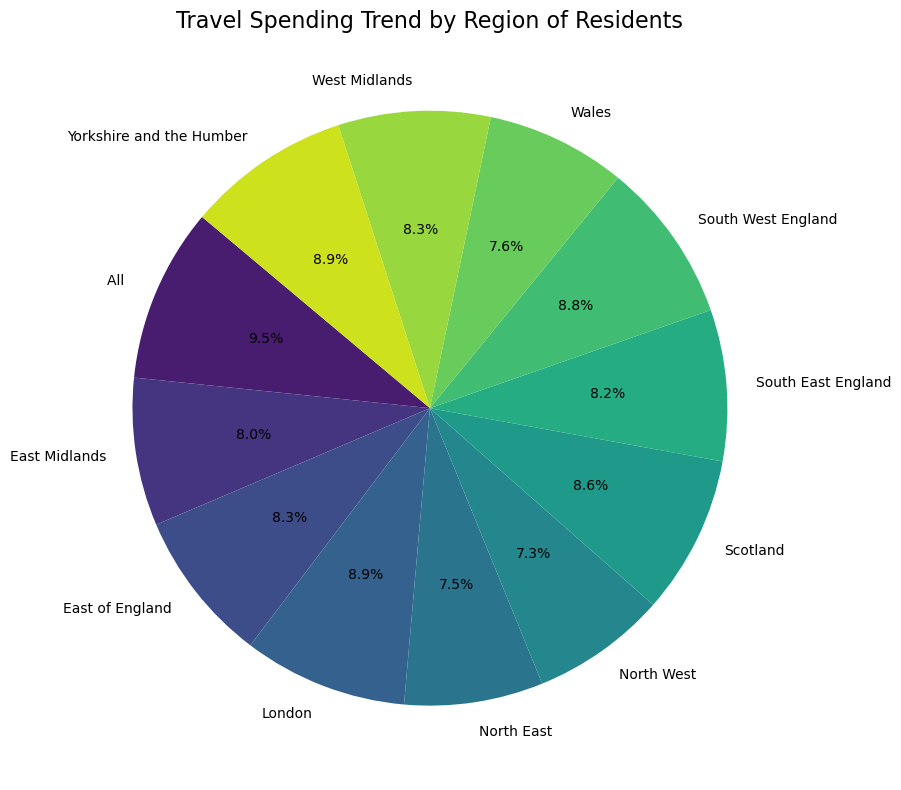

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group data by Region_of_Residence and sum the Spending
resident_trend_data = reshaped_df.groupby("Region_of_Residence")["Spending"].sum().reset_index()

# Plot the pie chart
plt.figure(figsize=(10, 8))
plt.pie(
    resident_trend_data["Spending"], 
    labels=resident_trend_data["Region_of_Residence"], 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=sns.color_palette("viridis", len(resident_trend_data))
)

# Customize the plot
plt.title("Travel Spending Trend by Region of Residents", fontsize=16)
plt.tight_layout()

# Display the plot
plt.show()


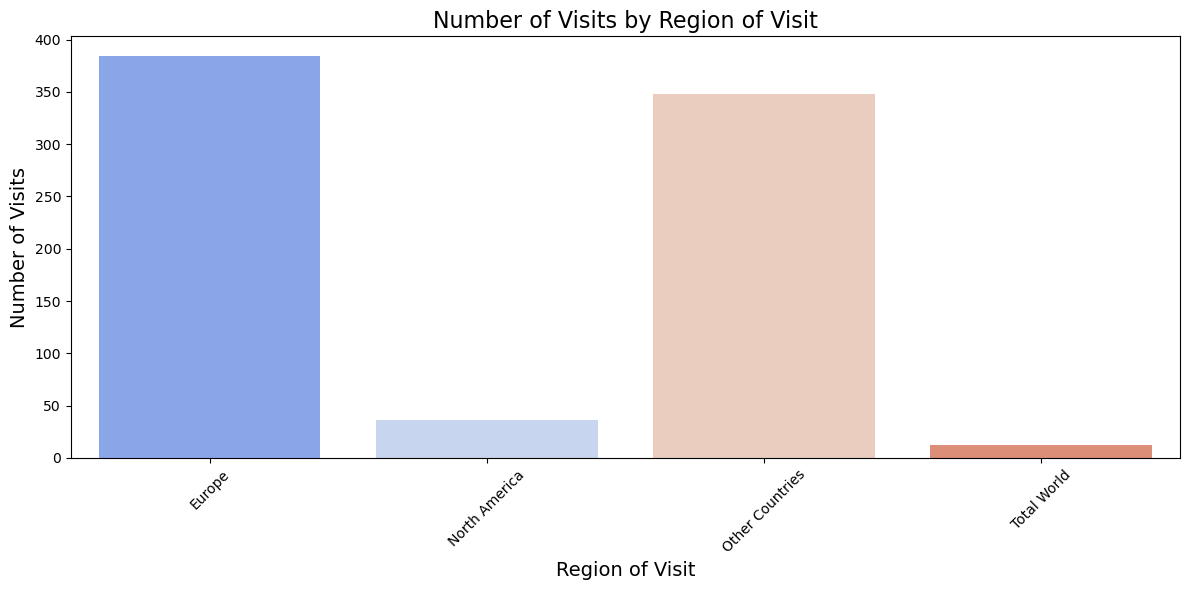

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group data by Region_of_Visit to count the number of visits
visit_count_data = reshaped_df.groupby("Region_of_Visit").size().reset_index(name="Number_of_Visits")

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=visit_count_data, x="Region_of_Visit", y="Number_of_Visits", palette="coolwarm")

# Customize the plot
plt.title("Number of Visits by Region of Visit", fontsize=16)
plt.xlabel("Region of Visit", fontsize=14)
plt.ylabel("Number of Visits", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()
